In [1]:
import matplotlib as plt
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns

count      8694.000000
mean      24937.634071
std       89187.238460
min           0.010297
25%           4.686802
50%         129.387245
75%        5487.976868
max      942734.833878
Name: flow, dtype: float64
       source  destination          flow  month
0     1387378      1387379     21.803603      1
1     1387378      1387380  21639.938651      1
2     1387378      1387381   3824.145367      1
3     1387378      1387382   9583.036027      1
4     1387378      1387384  90902.789688      1
...       ...          ...           ...    ...
8689  1387418      1387408     37.239318     12
8690  1387418      1387409   3098.299453     12
8691  1387418      1387411  16618.260872     12
8692  1387418      1387412   8592.451104     12
8693  1387418      1387414    125.006317     12

[8694 rows x 4 columns]


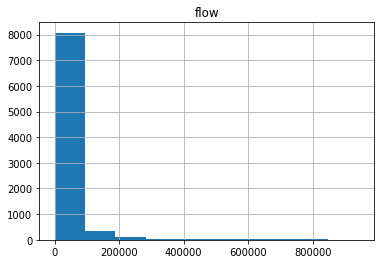

In [2]:
# get rid of edges with insignificant flow in the np network
# first, create a histogram of the flows
npdf = pd.read_csv('../SPREAD_food_networks/np/network/np/1.edges')
print(npdf['flow'].describe())
npdf.hist(column='flow')
# looking at this, I'll get rid of ~the bottom quartile (flow < 5)
print(npdf)



In [3]:
test = npdf.groupby('month').sum()
print(test)
npdf.groupby('month').count()

           source  destination          flow
month                                       
1       940655907    940654454  1.806732e+07
2       940655907    940654454  1.806732e+07
3       940655907    940654454  1.806732e+07
4       940655907    940654454  1.806732e+07
5      1172351447   1172349811  1.806732e+07
6       281641820    281641660  1.806732e+07
7       281641820    281641660  1.806732e+07
8      1191774917   1191775681  1.806732e+07
9      1191774917   1191775681  1.806732e+07
10     1191774917   1191775681  1.806732e+07
11     2047799526   2047799316  1.806732e+07
12      940655907    940654454  1.806732e+07


,source,destination,flow
month,,,
1,678,678,678
2,678,678,678
3,678,678,678
4,678,678,678
5,845,845,845
6,203,203,203
7,203,203,203
8,859,859,859
9,859,859,859


In [10]:
npdf.drop(npdf[npdf['flow'] < 130].index, inplace=True)

npdf.to_csv('../data/np_trade_significant.csv', index=False)


In [11]:
print(npdf)
#npdf.loc[:,'flow'] = 1
something = npdf.assign(flow=1)
#t.groupby('month').sum()
print(something)
print(something.groupby('month').sum())
print(npdf.groupby('month').sum())

       source  destination          flow  month
1     1387378      1387380  21639.938651      1
2     1387378      1387381   3824.145367      1
3     1387378      1387382   9583.036027      1
4     1387378      1387384  90902.789688      1
5     1387378      1387388    431.020482      1
...       ...          ...           ...    ...
8687  1387418      1387401    142.818877     12
8688  1387418      1387403    338.987366     12
8690  1387418      1387409   3098.299453     12
8691  1387418      1387411  16618.260872     12
8692  1387418      1387412   8592.451104     12

[4347 rows x 4 columns]
       source  destination  flow  month
1     1387378      1387380     1      1
2     1387378      1387381     1      1
3     1387378      1387382     1      1
4     1387378      1387384     1      1
5     1387378      1387388     1      1
...       ...          ...   ...    ...
8687  1387418      1387401     1     12
8688  1387418      1387403     1     12
8690  1387418      1387409     1     12

In [12]:
# read in the nepal network

# !python3 bidirec_script.py '../SPREAD_food_networks/np/networks/np/1.edges' 0 1 3 ',' 1 12 out_np_delta_1.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 2 12 out_np_delta_2.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 3 12 out_np_delta_3.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 4 12 out_np_delta_4.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 5 12 out_np_delta_5.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 6 12 out_np_delta_6.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 7 12 out_np_delta_7.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 8 12 out_np_delta_8.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 9 12 out_np_delta_9.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 10 12 out_np_delta_10.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 11 12 out_np_delta_11.csv
# !python3 bidirec_script.py '../SPREAD_food_networks/np/network/np/1.edges' 0 1 3 ',' 12 12 out_np_delta_12.csv

# can import the script directly into the jupyter notebook
# also can use glob to make this calling simpler
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 1 12 out_np_delta_1.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 2 12 out_np_delta_2.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 3 12 out_np_delta_3.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 4 12 out_np_delta_4.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 5 12 out_np_delta_5.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 6 12 out_np_delta_6.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 7 12 out_np_delta_7.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 8 12 out_np_delta_8.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 9 12 out_np_delta_9.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 10 12 out_np_delta_10.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 11 12 out_np_delta_11.csv
!python3 bidirec_script.py '../data/np_trade_significant.csv' 0 1 3 ',' 12 12 out_np_delta_12.csv

In [13]:
graphnp_d_1 = pd.read_csv('out_np_delta_1.csv')
graphnp_d_2 = pd.read_csv('out_np_delta_2.csv')
graphnp_d_3 = pd.read_csv('out_np_delta_3.csv')
graphnp_d_4 = pd.read_csv('out_np_delta_4.csv')
graphnp_d_5 = pd.read_csv('out_np_delta_5.csv')
graphnp_d_6 = pd.read_csv('out_np_delta_6.csv')
graphnp_d_7 = pd.read_csv('out_np_delta_7.csv')
graphnp_d_8 = pd.read_csv('out_np_delta_8.csv')
graphnp_d_9 = pd.read_csv('out_np_delta_9.csv')
graphnp_d_10 = pd.read_csv('out_np_delta_10.csv')
graphnp_d_11 = pd.read_csv('out_np_delta_11.csv')
graphnp_d_12 = pd.read_csv('out_np_delta_12.csv')

In [14]:
g = pd.concat([graphnp_d_1, graphnp_d_2, graphnp_d_3, graphnp_d_4, graphnp_d_5, graphnp_d_6, graphnp_d_7, graphnp_d_8, graphnp_d_9, graphnp_d_10, graphnp_d_11, graphnp_d_12])

<AxesSubplot:xlabel='t1', ylabel='count'>

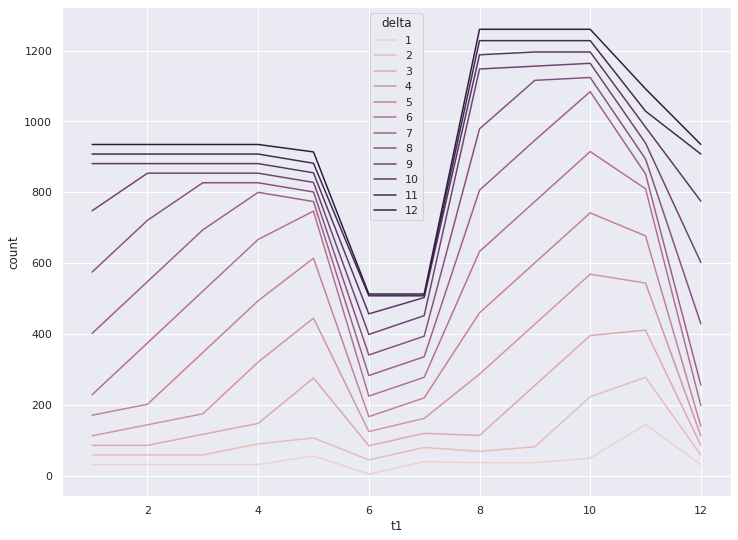

In [15]:
df=g[['t1', 'count', 'delta']].groupby(['t1', 'delta']).sum().reset_index()
sns.set(rc={'figure.figsize':(12,9)})

sns.lineplot(data=df, x='t1', y='count', hue='delta', legend='full')